# Walmart Customer Purchase Behavior📈🔎🎯

In [3]:
#Import Required libaries
import os
import pandas as pd
import kagglehub
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

1. Download a public dataset (e.g., sales, customer data) from Kaggle or any open-source platform

In [4]:
# Download the dataset
path = kagglehub.dataset_download("logiccraftbyhimanshi/walmart-customer-purchase-behavior-dataset")
print("Path to dataset files:", path)

# List all files in the dataset folder to find the CSV file
files = os.listdir(path)
print("Files in the dataset folder:", files)

# Replace 'file_name.csv' with the actual file name after checking the files list
file_name = "Walmart_customer_purchases.csv"  # Update this with the correct file name
full_path = os.path.join(path, file_name)

# Load the dataset into a pandas DataFrame
try:
    walmart_df = pd.read_csv(full_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at: {full_path}")

walmart_df.head()

Path to dataset files: C:\Users\Venkateshwaran\.cache\kagglehub\datasets\logiccraftbyhimanshi\walmart-customer-purchase-behavior-dataset\versions\1
Files in the dataset folder: ['Walmart_customer_purchases.csv']
Dataset loaded successfully!


,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


2. Clean the dataset by handling missing values and duplicates.  

In [5]:
walmart_df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [6]:
# Check for duplicates in the entire DataFrame
duplicates = walmart_df.duplicated()
print("Duplicate rows:")
print(walmart_df[duplicates])
# Count the total number of duplicate rows
num_duplicates = duplicates.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate rows:
Empty DataFrame
Columns: [Customer_ID, Age, Gender, City, Category, Product_Name, Purchase_Date, Purchase_Amount, Payment_Method, Discount_Applied, Rating, Repeat_Customer]
Index: []

Number of duplicate rows: 0


3. Perform exploratory data analysis (EDA) using Excel, Power BI, or Python (Pandas).  I have python for EDA and Visualizations
4. Identify key trends, patterns, and correlations.  
5. Create visualizations (bar charts, pie charts, line graphs) to represent findings.  
6. Write a summary report highlighting key insights and recommendations.  

In [7]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [8]:
walmart_df.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [9]:
unique_customers = walmart_df['Customer_ID'].nunique()
print("Number of unique Customer_IDs:", unique_customers)

Number of unique Customer_IDs: 50000


### Sales Distribution by Gender

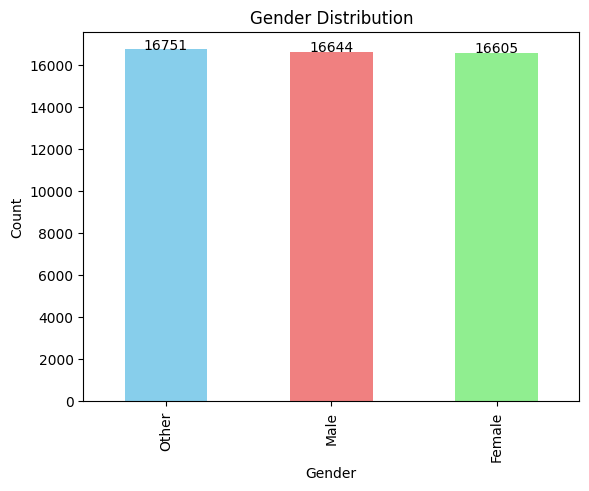

In [10]:
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen']  # Assign unique colors for the genders

# Get the counts for each gender
gender_counts = walmart_df['Gender'].value_counts()

# Create the bar plot
ax = gender_counts.plot(kind='bar', color=colors)

# Set the title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add values on top of each bar
for i, value in enumerate(gender_counts):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10, color='black')

# Show the plot
plt.show()

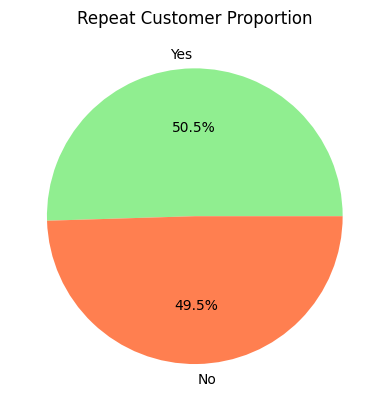

In [11]:
walmart_df['Repeat_Customer'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'coral'])
plt.title('Repeat Customer Proportion')
plt.ylabel('')
plt.show()

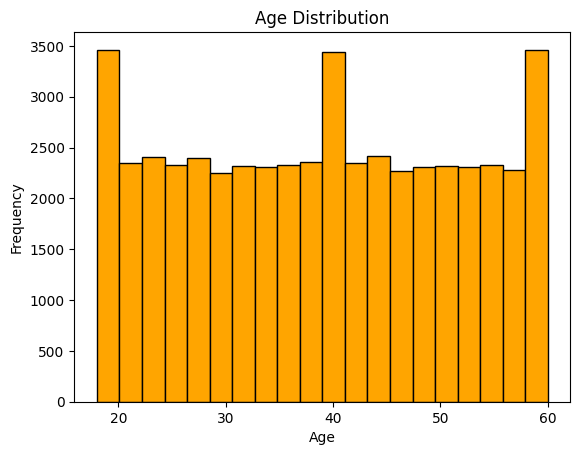

In [12]:
walmart_df['Age'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

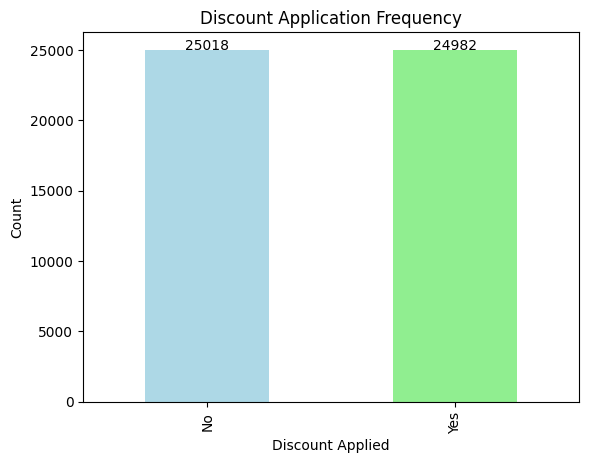

In [14]:

# Get the counts for each discount category
discount_counts = walmart_df['Discount_Applied'].value_counts()

# Define colors for each bar
colors = ['lightblue', 'lightgreen', 'coral'][:len(discount_counts)]  # Adjust for the number of categories

# Create the bar plot
ax = discount_counts.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Discount Application Frequency')
plt.xlabel('Discount Applied')
plt.ylabel('Count')

# Add values on top of each bar
for i, value in enumerate(discount_counts):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10)

# Show the plot
plt.show()


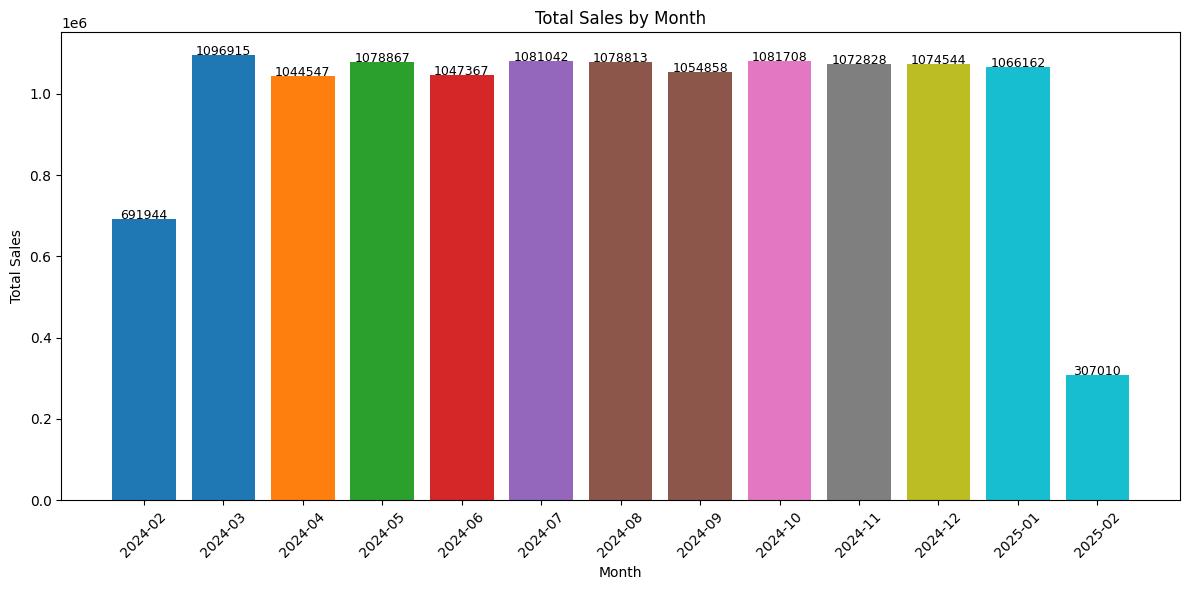

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'Purchase_Date' is in datetime format
walmart_df['Purchase_Date'] = pd.to_datetime(walmart_df['Purchase_Date'])

# Group by month and calculate total purchase amount
monthly_sales = walmart_df.groupby(walmart_df['Purchase_Date'].dt.to_period('M'))['Purchase_Amount'].sum()

# Convert monthly sales into a DataFrame and reset the index
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month'] = monthly_sales_df['Purchase_Date'].dt.strftime('%Y-%m')  # Format: Year-Month

# Define colors for each month
colors = plt.cm.tab10(np.linspace(0, 1, len(monthly_sales_df)))  # Generate unique colors for each bar

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales_df['Month'], monthly_sales_df['Purchase_Amount'], color=colors)

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', fontsize=9)

# Customize the plot
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()




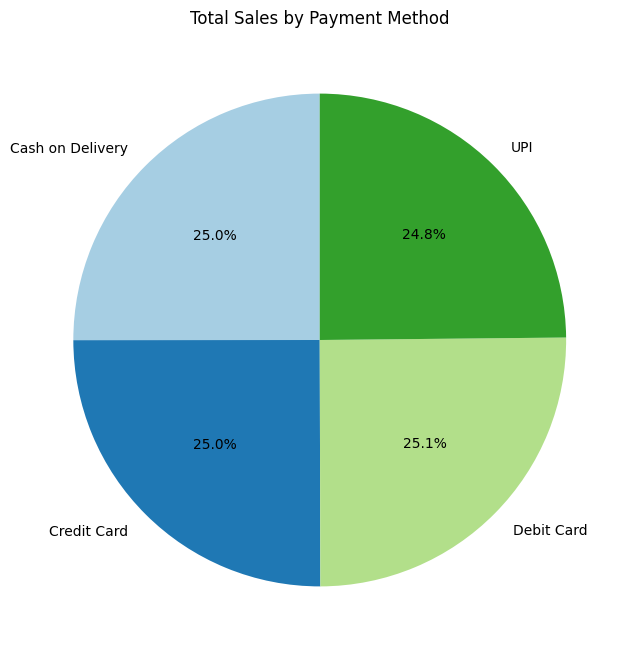

In [19]:
# Group by 'Payment_Method' and calculate total sales
payment_method_sales = walmart_df.groupby('Payment_Method')['Purchase_Amount'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_method_sales, labels=payment_method_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Total Sales by Payment Method')

# Display the chart
plt.show()

In [22]:
# Group by 'City' and calculate the average sales
city_avg_sales = walmart_df.groupby('City')['Purchase_Amount'].mean()

# Convert to DataFrame for cleaner plotting
city_avg_sales_df = city_avg_sales.reset_index()
city_avg_sales_df.columns = ['City', 'Average Sales']

In [ ]:
city_avg_sales_df

,City,Average Sales
24292,West Paulport,499.99
24343,West Rebeccashire,499.97
19552,Sheppardshire,499.95
17569,Port Martinberg,499.93
348,Andersenland,499.93
...,...,...
5342,Ericborough,10.09
24151,West Melissaborough,10.08
3079,Devintown,10.08
15460,North Rogerberg,10.08


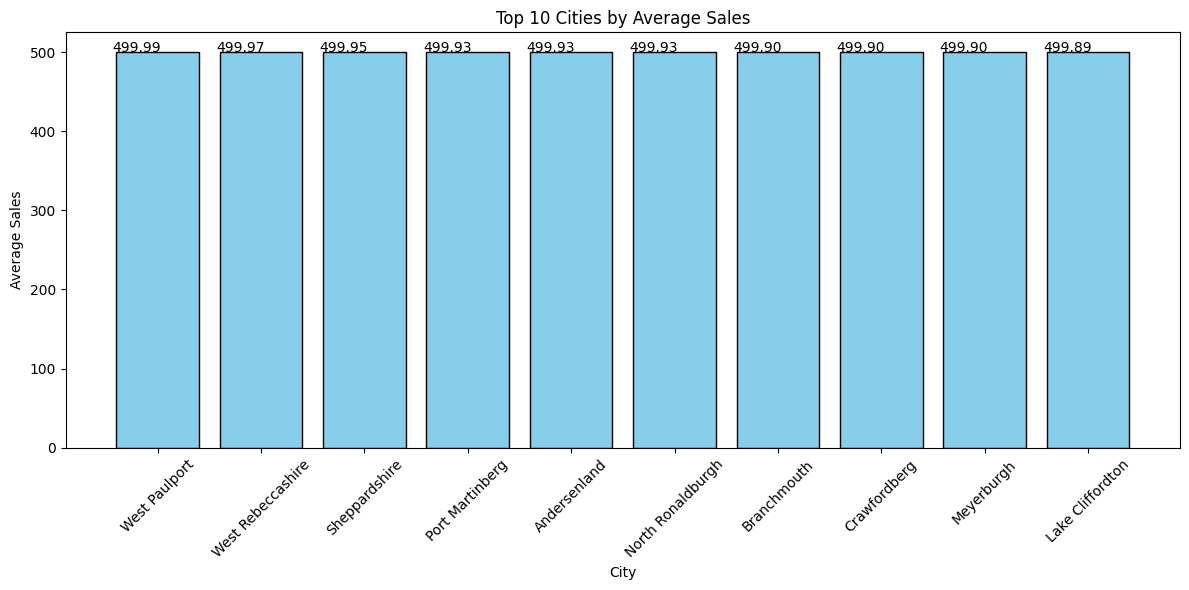

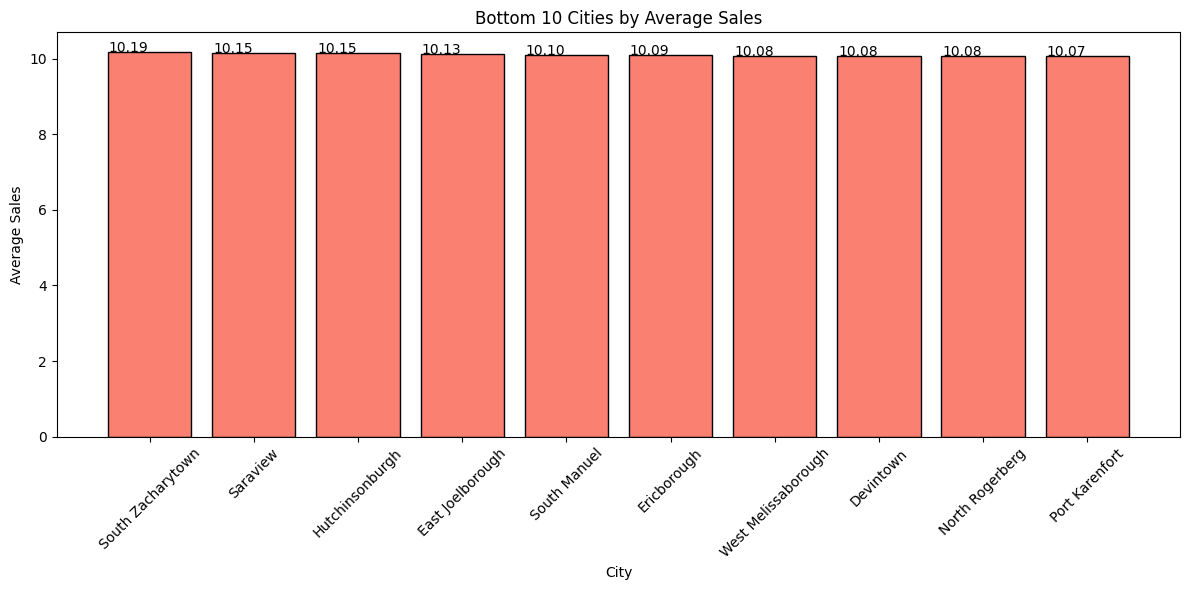

In [27]:
import matplotlib.pyplot as plt

# Group by 'City' and calculate the average sales
city_avg_sales = walmart_df.groupby('City')['Purchase_Amount'].mean()

# Sort the cities by average sales
sorted_avg_sales = city_avg_sales.sort_values(ascending=False)

# Extract Top 10 and Bottom 10 Cities
top_10_cities = sorted_avg_sales.head(10)
bottom_10_cities = sorted_avg_sales.tail(10)

# Plot Top 10 Cities
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cities.index, top_10_cities.values, color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 4, height , f'{height:.2f}', ha='center', fontsize=10)
plt.title('Top 10 Cities by Average Sales')
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Bottom 10 Cities
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_10_cities.index, bottom_10_cities.values, color='salmon', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 4, height, f'{height:.2f}', ha='center', fontsize=10)
plt.title('Bottom 10 Cities by Average Sales')
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


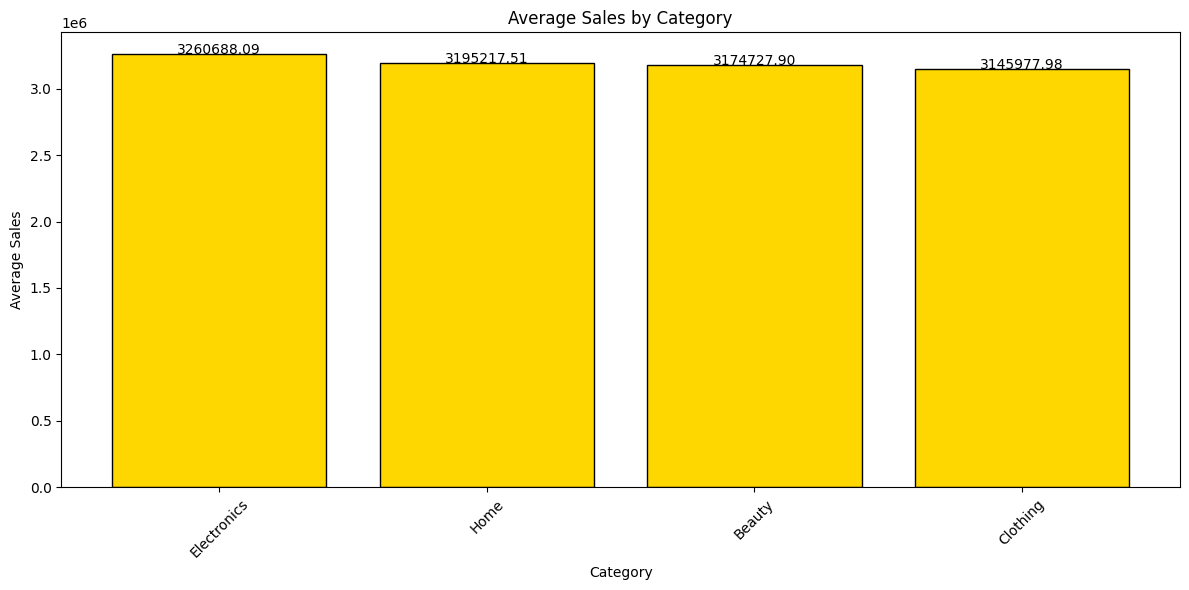

In [29]:
import matplotlib.pyplot as plt

# Group by 'Category' and calculate the average sales
category_avg_sales = walmart_df.groupby('Category')['Purchase_Amount'].sum()

# Sort the data for better visualization
category_avg_sales_sorted = category_avg_sales.sort_values(ascending=False)

# Create a column chart (bar chart)
plt.figure(figsize=(12, 6))
bars = plt.bar(category_avg_sales_sorted.index, category_avg_sales_sorted.values, color='gold', edgecolor='black')

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.2f}', ha='center', fontsize=10)

# Customize the chart
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

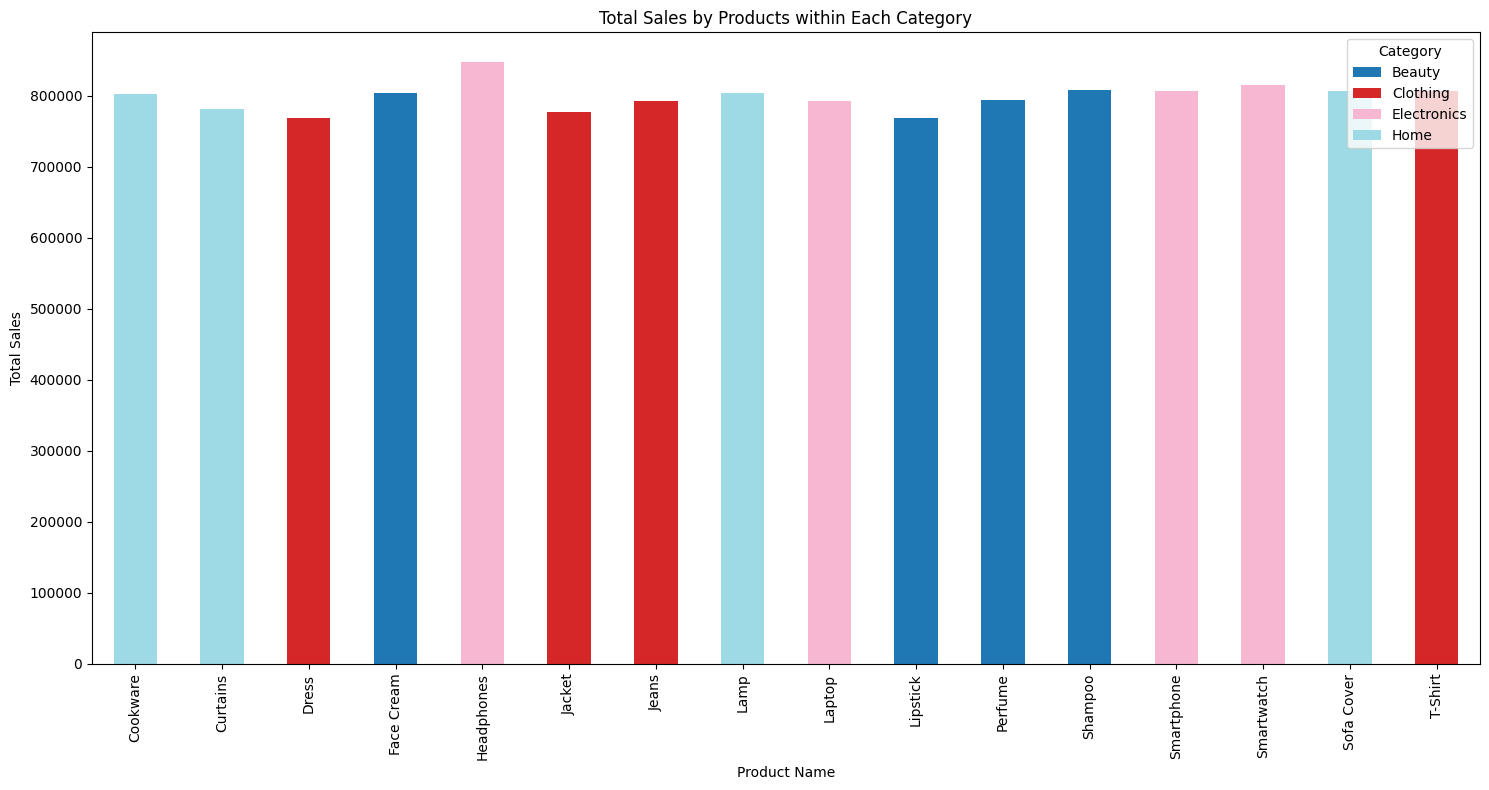

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by 'Category' and 'Product_Name', then calculate total sales
category_product_sales = walmart_df.groupby(['Category', 'Product_Name'])['Purchase_Amount'].sum()

# Sort the sales within each category in descending order
sorted_category_product_sales = category_product_sales.sort_values(ascending=False)

# Reset index for a clean DataFrame
sorted_category_product_sales_df = sorted_category_product_sales.reset_index()
sorted_category_product_sales_df.columns = ['Category', 'Product_Name', 'Total Sales']

# Create a pivot table to prepare data for a stacked bar plot
pivot_data = sorted_category_product_sales_df.pivot(index='Product_Name', columns='Category', values='Total Sales').fillna(0)

# Plot the data as a stacked bar plot
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='tab20')

# Customize the plot
plt.title('Total Sales by Products within Each Category')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()
